# Prova de Python para Análise de Dados - EPGE - 2022
---

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Questão 1

Crie uma função $f$ que receba um número $n$ e retorne

$$
f(n) = \sqrt{6\cdot\sum_{i=1}^{n} \frac{1}{i^2}}
$$

Obs.:
1. Assuma que $n$ pode ser tanto um _int_ quanto um _float_ mas nada além disso.
2. Sua função deve ser capaz de calcular $f(10^8)$ em menos de 1,5s.
3. Para checar se sua função está correta, você pode utilizar o seguinte fato: 
$$
\lim_{n\rightarrow +\infty} f(n)=\pi
$$
Assim, por exemplo, $f(10^8)$ deve ser bem próximo de 3.1415926...

In [36]:
import numpy as np

def f(n):
    x = np.arange(1,n+1)
    x = 1/x**2
    return(np.sqrt(6 * x.sum()))

In [33]:
f(1e8)

3.14159264404049

In [34]:
#Esta célula calcula quanto tempo sua função demora para rodar f(10^8).
#Deixe esta célula como a última célula da sua resposta.
%timeit f(1e8)

340 ms ± 6.99 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Questão 2

Importe os dados sobre munocípios brasileiros que você encontra na url abaixo:

In [4]:
url = "https://raw.githubusercontent.com/mapaslivres/municipios-br/main/tabelas/municipios.csv"

Você deve importar _apenas_ as colunas `municipio`, e `pop_21`, que são as colunas que iremos usar.

A variável `município` é o código IBGE do município. O primeiro dígito dessa variável representa a região do Brasil em que o município se encontra:

* 1 é região Norte
* 2 é região Nordeste
* 3 é região Sudeste
* 4 é região Sul
* 5 é região Centro-Oeste

Com esses dados, construa um dataframe que contenha a população total de cada região do Brasil, em ordem decrescente de população.

Esse dataframe deve ser indexado pelas regiões do Brasil, denotadas N, NE, SE, S e CO.

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv(url, usecols=['municipio','pop_21'])

In [7]:
df['regiao'] = (df.
                municipio.
                apply(lambda x: str(x)[0]).
                values
               )

df['regiao'] = df.regiao.replace({'1': 'N', '2':'NE','3':'SE','4':'S','5':'CO'})

In [8]:
df[['regiao','pop_21']].groupby('regiao').sum().sort_values('pop_21', ascending=False)

,pop_21
regiao,
SE,89632912
NE,57667842
S,30402587
N,18906962
CO,16707336


# Questão 3

O link a seguir contém dados a respeito do processo seletivo de uma empresa. As variáveis são as seguintes:

* `gender`: O gênero do candidato
* `sat`: A nota tirada pelo candidato no exame de SAT.
* `gpa`: O C.R. do candidato
* `apttest`: A nota que o candidato obteve em um teste de aptidão à vaga
* `int1` : A nota dada ao candidato pelo primeiro entrevistador
* `int2` : A nota dada ao candidato pelo segundo entrevistador
* `int3` : A nota dada ao candidato pelo terceiro entrevistador
* `hired`: 1, caso o candidato tenha sido contratado, e 0 caso contrário.



In [11]:
url = "https://peopleanalytics-regression-book.org/data/recruiting.csv"

## (a) 
Qual fração dos candidatos são mulheres?  
Qual fração dos aprovados são mulheres?

In [12]:
df = pd.read_csv(url)

In [13]:
df.gender.value_counts(normalize=True)

F    0.511387
M    0.488613
Name: gender, dtype: float64

In [14]:
df[['gender','hired']].replace({'F': 1, 'M': 0}).groupby('hired').mean()

,gender
hired,
0,0.533333
1,0.419355


## (b)
Faça uma regressão logística para explicar a contratação (`hired`) em termos das demais variáveis da base. Use uma abordagem de Estatística clássica, produzindo estimativas para os coeficientes, erros-padrão e p-valores.  

Exiba a tabela com os resultados da regressão.

Obs.: A regressão deve ter uma única dummy designando gênero e esta deve ser 1 quando o gênero é masculino e 0 caso contrário.

In [17]:
import statsmodels.api as sm

In [18]:
dfreg = pd.get_dummies(df).drop(columns='gender_F')

X = dfreg.drop(columns='hired')
y = dfreg['hired']
X = sm.add_constant(X)

lg = sm.Logit(y,X).fit()
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.208131
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  hired   No. Observations:                  966
Model:                          Logit   Df Residuals:                      958
Method:                           MLE   Df Model:                            7
Date:                Sun, 25 Sep 2022   Pseudo R-squ.:                  0.5752
Time:                        18:09:56   Log-Likelihood:                -201.05
converged:                       True   LL-Null:                       -473.24
Covariance Type:            nonrobust   LLR p-value:                2.300e-113
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.1752      3.571    -10.131      0.000     -43.174     -29.177
sat           -0.0015      0.

# Questão 5

Utilizando os mesmos dados da questão anterior, construa um modelo de Data Science para prever a `hired` a partir das outras variáveis (_features_). 

Aqui está novamente o link, para facilitar:

In [19]:
url = "https://peopleanalytics-regression-book.org/data/recruiting.csv"

Antes de mais nada, normalize as variáveis dividindo-as todas pelos seus valores máximos:
* o valor máximo do `sat` é 1600
* o valor máximo do `gpa` é 4
* o valor máximo do `apttest` é 100
* os valores máximos de `int1`, `int2` e `int3` são todos iguais a 5  

Após a normalização, todas essas variáveis deverão estar contidas no intervalo $[0;1]$.

A seguir, cria um dataframe contendo _precision_, _recall_, _f1_, _accuracy_ e _AUC_ para os modelos a seguir. Para facilitar, eu já disponibilizo o código para importá-los:

In [26]:
# Modelos
from sklearn.dummy import DummyClassifier #dummy
from sklearn.linear_model import LogisticRegression #reg_log
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier #arvore_decisao
from sklearn.ensemble import RandomForestClassifier #random_forest

#Métricas
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve, roc_auc_score

#Utils
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## (a)
Apresente esse dataframe ordenado em ordem decrescente de AUC.

In [27]:
df = pd.read_csv(url)

df['gender'] = df.gender.replace({'F': 0, 'M': 1})
df['sat'] = df.sat/1600
df['gpa'] = df.gpa/4
df['apttest'] = df.apttest/100
df['int1'] = df.int1/5
df['int2'] = df.int2/5
df['int3'] = df.int3/5

df = df.astype('float64')

In [28]:
modelos = {'dummy': DummyClassifier(),
           'logistic': LogisticRegression(),
           'KNN': KNeighborsClassifier(),
           'tree': DecisionTreeClassifier(),
           'rf': RandomForestClassifier()
          }


resultados = pd.DataFrame([], index = modelos.keys(), columns=['precision','recall','f1','accuracy','auc'])

In [29]:
X = df.drop(columns='hired')
y = df.hired

In [30]:
Xtrn, Xtst ,ytrn,  ytst = train_test_split(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


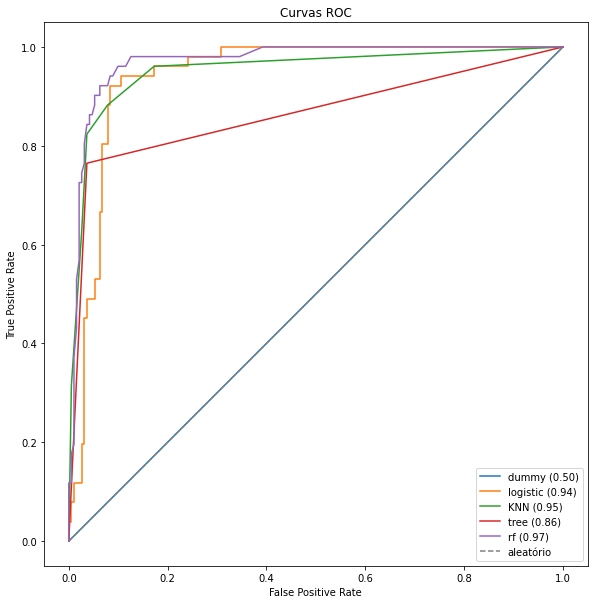

In [31]:
plt.figure(figsize=(10,10))

for nome, modelo in modelos.items():
    modelo.fit(Xtrn,ytrn)
    ypred = modelo.predict(Xtst)
    ppred = modelo.predict_proba(Xtst)[:,1]
    

    
    precision = precision_score(ytst, ypred)
    recall = recall_score(ytst, ypred)
    f1 = f1_score(ytst, ypred)
    accuracy = accuracy_score(ytst, ypred)
    auc = roc_auc_score(ytst, ppred)
    
    resultados.loc[nome,:] = precision, recall, f1, accuracy, auc
    
    fpr, tpr, _ = roc_curve(ytst, ppred)
    plt.plot(fpr, tpr, label=f'{nome} ({auc:.2f})')
    
    modelos[nome] = modelo

plt.title('Curvas ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0,1],[0,1], c='gray', linestyle='dashed', label='aleatório')
plt.legend()
plt.axis('square')
plt.show()

In [32]:
resultados.sort_values('auc', ascending=False)

,precision,recall,f1,accuracy,auc
rf,0.843137,0.843137,0.843137,0.933884,0.97064
KNN,0.857143,0.823529,0.84,0.933884,0.951853
logistic,0.777778,0.411765,0.538462,0.85124,0.942203
tree,0.847826,0.764706,0.804124,0.921488,0.864028
dummy,0.0,0.0,0.0,0.789256,0.5


## (b)
Apresente as curvas ROC de cada modelo em um único gráfico. O gráfico deve ter:

* Título: "Curvas ROC"
* Nome do eixo x: "Taxa de falsos positivos"
* Nome do eixo y: "Taxa de verdadeiros positivos"
* Tamanho 10 x 10
* Legenda, indicando qual curva corresponde a qual modelo, com os valores dos respectivos AUC entre parêntesis. (Por exemplo, "dummy (0.54)")
* Uma reta cinza tracejada entre os pontos (0,0) e (1,1) e legenda "aleatório"

Você pode responder essa pergunta juntamente com a anterior, se preferir.

## (c)

Salve o modelo com o melhor AUC em um arquivo. Em seguida, importe o modelo deste arquivo com um nome diferente do nome do seu modelo inicial. 

In [ ]:
import pickle

In [ ]:
pickle.dump(modelos['rf'], open('meu_modelo.pkl','wb'))

In [ ]:
minha_rf = pickle.load(open('meu_modelo.pkl','rb'))

In [ ]:
minha_rf